In [27]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import urllib.request as urllib2
import pandas as pd

In [28]:
df_input = pd.read_csv (r'outfit_objects_data.csv')

In [43]:
outfit_id = df_input['outfit_id'][5]

In [44]:
url = 'https://www.aboutyou.de' + outfit_id

In [45]:
### get url
code = requests.get(url)
plain = code.text

In [46]:
url_list = []
start_position = 0

for i in range(1,100):
    second_position=plain.find('data-test-id="FullScreenImageContainer"', start_position)
    #plain[start_position:(start_position+len('data-test-id="FullScreenImageContainer"'))]
    if second_position == -1:
        break
    start = plain.find('background-image:url(//', second_position)
    if start == -1:
        break
    end = plain.find(')"', start)
    if end == -1:
        break
    url = plain[start + len('background-image:url(//'):end]
    print("url is founded:")
    print(url)
    url_list.append(url)
    new_start_position = plain.find("</div><div", end)
    if new_start_position == -1:
        break    
    delta = new_start_position - second_position
    if delta > 1000:
        break
    start_position =new_start_position


url is founded:
cdn.aboutstatic.com/file/1b6b9b0247b3060be4d731417ce2fd1a.jpg?width=800&amp;height=800&amp;quality=90
url is founded:
cdn.aboutstatic.com/file/7c607a84c16d97f71b2b090235f7e81a.jpg?width=800&amp;height=800&amp;quality=90
url is founded:
cdn.aboutstatic.com/file/5f3023846f8e61d10a36361f77944529.jpg?width=800&amp;height=800&amp;quality=90
url is founded:
cdn.aboutstatic.com/file/12ceb4ac614ebb3f2684a82068af3b85.jpg?width=800&amp;height=800&amp;quality=90
url is founded:
cdn.aboutstatic.com/file/a89c6bcb23313446821a32d8cb4cda9a.jpg?width=800&amp;height=800&amp;quality=90
url is founded:
cdn.aboutstatic.com/file/2f84fe098e34efe4eb3f01b67cd2c8d0.jpg?width=800&amp;height=800&amp;quality=90
url is founded:
cdn.aboutstatic.com/file/81907cd499a0ee901d8090046a9592d2.jpg?width=800&amp;height=800&amp;quality=90


In [50]:
# remove the default images (three)
#cdn.aboutstatic.com/file/a89c6bcb23313446821a32d8cb4cda9a.jpg?width=800&amp;height=800&amp;quality=90
#cdn.aboutstatic.com/file/2f84fe098e34efe4eb3f01b67cd2c8d0.jpg?width=800&amp;height=800&amp;quality=90
#cdn.aboutstatic.com/file/81907cd499a0ee901d8090046a9592d2.jpg?width=800&amp;height=800&amp;quality=90
try:
    url_list.remove("cdn.aboutstatic.com/file/a89c6bcb23313446821a32d8cb4cda9a.jpg?width=800&amp;height=800&amp;quality=90")
except:
    pass

try:
    url_list.remove("cdn.aboutstatic.com/file/2f84fe098e34efe4eb3f01b67cd2c8d0.jpg?width=800&amp;height=800&amp;quality=90")
except:
    pass
try:
    url_list.remove("cdn.aboutstatic.com/file/81907cd499a0ee901d8090046a9592d2.jpg?width=800&amp;height=800&amp;quality=90")
except:
    pass

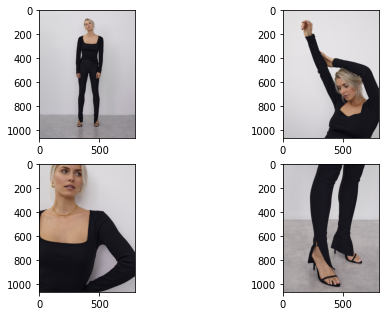

In [51]:
fig = plt.figure(figsize=(8, 8))
rows = 3
columns = round(len(url_list)/3)+1
for i in range(0, len(url_list)):
    url = url_list[i]
    url_t = 'https://' + url
    response = requests.get(url_t)  
    img = Image.open(BytesIO(response.content))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

## backup


In [17]:
# display image:
def display_image(url):
    url_t = 'https://' + url
    response = requests.get(url_t)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)

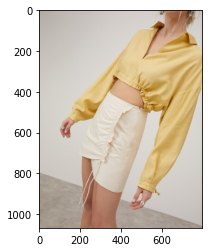

In [19]:
display_image(url_list[1])

In [11]:
second_position=plain.find('data-test-id="FullScreenImageContainer"', start_position)
#plain[start_position:(start_position+len('data-test-id="FullScreenImageContainer"'))]
start = plain.find('background-image:url(//', second_position)
end = plain.find(')"', start)
url = plain[start + len('background-image:url(//'):end]
print(url)
new_start_position = plain.find("</div><div", end)
new_start_position

cdn.aboutstatic.com/file/4d4c837d76f01d7e5e73b6d65c2d844e.jpg?width=800&amp;height=800&amp;quality=90


133636

In [8]:
start_position = new_start_position

In [9]:
second_position=plain.find('data-test-id="FullScreenImageContainer"', start_position)
#plain[start_position:(start_position+len('data-test-id="FullScreenImageContainer"'))]
start = plain.find('background-image:url(//', second_position)
end = plain.find(')"', start)
url = plain[start + len('background-image:url(//'):end]
print(url)
new_start_position = plain.find("</div><div", end)
new_start_position

cdn.aboutstatic.com/file/fe80a67cf5a915477ae30afe50f793d9.jpg?width=800&amp;height=800&amp;quality=90


133848

In [10]:
start_position = new_start_position
second_position=plain.find('data-test-id="FullScreenImageContainer"', start_position)
#plain[start_position:(start_position+len('data-test-id="FullScreenImageContainer"'))]
start = plain.find('background-image:url(//', second_position)
end = plain.find(')"', start)
url = plain[start + len('background-image:url(//'):end]
print(url)
new_start_position = plain.find("</div><div", end)
new_start_position

cdn.aboutstatic.com/file/24bd7822d7505212f55ed7d55a33a8c7.jpg?width=800&amp;height=800&amp;quality=90


134066